<a href="https://colab.research.google.com/github/Vayansh/Machine_learning_training/blob/main/Ridge_lasso_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
from sklearn.model_selection import train_test_split

In [43]:
import seaborn as sns

In [6]:
dataset = fetch_california_housing()

In [7]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df['target'] = dataset.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
lr = LinearRegression()
mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.5582901717686546


# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge = Ridge()
parameter = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-2,1,5,10,15,20,30,50,100]}
ridge_regressor = GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv = 5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   15, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [24]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-0.5579557674778972


In [41]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   15, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [42]:
y_pred2 = ridge_regressor.predict(X_test)

<Axes: xlabel='target', ylabel='Density'>

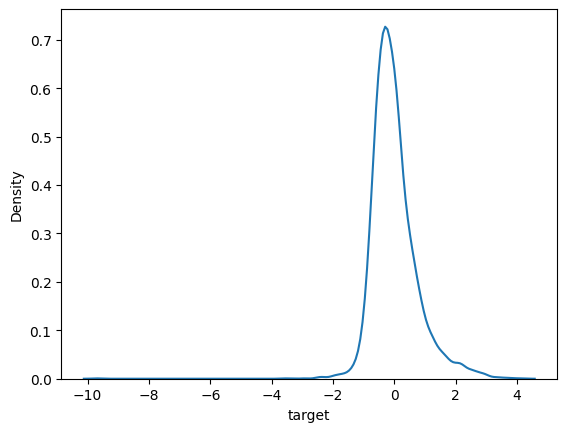

In [53]:
sns.kdeplot(y_test-y_pred2)

# Lasso Regression 

In [26]:
from sklearn.linear_model import Lasso

In [28]:
la = Lasso()
lasso_reg = GridSearchCV(la,parameter,scoring = 'neg_mean_squared_error',cv = 5)
lasso_reg.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, tolerance: 2.110e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   15, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [29]:
print(lasso_reg.best_params_)

{'alpha': 1e-05}


In [30]:
print(lasso_reg.best_score_)

-0.558289383479017


In [38]:
lasso_reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e+03, tolerance: 1.755e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.760e+03, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+02, tolerance: 1.763e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   15, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [40]:
y_pred1 = lasso_reg.predict(X_test)


<Axes: xlabel='target', ylabel='Density'>

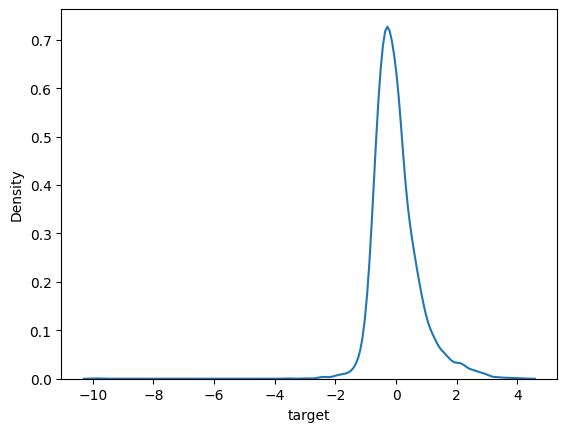

In [52]:
sns.kdeplot(y_test-y_pred1)         # Lasso Regression